In [1]:
import pandas as pd
import seaborn as sns
import gc
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/My Drive/Github/capstone

/content/gdrive/My Drive/Github/capstone


In [4]:
# import my custom library into colab
import sys
sys.path.append('/content/gdrive/MyDrive/Github/capstone/')
import mylibrary as mylib

In [5]:
df = pd.read_pickle('data/master_data.pkl')
df_pats_w_sectors = pd.read_pickle('data/pats_w_sectors.pkl')

In [6]:
df_master = mylib.merge_and_clean(df_pats_w_sectors, df)

In [7]:
df_master = df_master[df_master.sector!='Other fields']
df_master

,patent_id,sector,text
0,10001059,Mechanical engineering,1. A method of removing a tower shaft of a gas...
1,10189524,Mechanical engineering,"1. A two-wheeled vehicle, comprising: a frame ..."
2,10309306,Mechanical engineering,1. A turbofan engine comprising: a fan rotatab...
3,10427924,Mechanical engineering,1. An industrial truck comprising: a mast; a l...
4,10428949,Mechanical engineering,1. A header ring comprising: an opening; a rad...
...,...,...,...
2265879,10800649,Chemistry,1. A microelectromechanical systems (MEMS) dev...
2265880,10800650,Chemistry,1. A semiconductor device comprising: a cavity...
2265881,10807862,Chemistry,"1. A semiconductor device, comprising: a semic..."
2265882,10807863,Chemistry,1. A method for manufacturing micromechanical ...


In [8]:
# truncate data for testing purposes
df = df_master#[:int(len(df_master.patent_id)*0.8)]
del df_master
gc.collect()

63

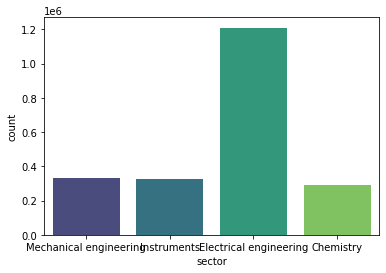

In [9]:
# Look at the counts for each category
ax = sns.countplot(x='sector', data=df, palette='viridis')

In [10]:
sizes = pd.DataFrame()
sizes['sector'] = list(set(df.sector))
sizes['sector_count'] = [len(df[df.sector==sector]) for sector in sizes.sector]
sizes

,sector,sector_count
0,Mechanical engineering,333013
1,Chemistry,291608
2,Instruments,324065
3,Electrical engineering,1209981


In [11]:
class_size = 200000
trimmed_df = pd.DataFrame()
for sector in sizes.sector:
  group = df[df.sector == sector][:class_size]
  trimmed_df = trimmed_df.append(group)
trimmed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800000 entries, 0 to 357595
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   patent_id  800000 non-null  int64 
 1   sector     800000 non-null  object
 2   text       800000 non-null  object
dtypes: int64(1), object(2)
memory usage: 24.4+ MB


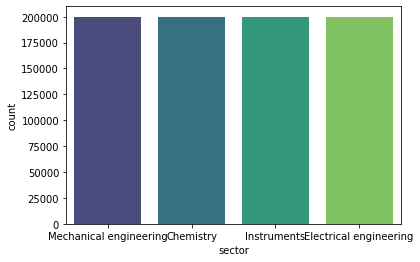

In [12]:
ax = sns.countplot(x='sector', data=trimmed_df, palette='viridis')

In [13]:
del df
df = trimmed_df
y = df['sector']
X = df['text']
del trimmed_df
gc.collect()

2391

In [14]:
# Dataset with 4 classes
y.to_pickle('data/y_4class.pkl')
X.to_pickle('data/X_4class.pkl')

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)
y_train.to_pickle('data/y_train_4class.pkl')
y_test.to_pickle('data/y_test_4class.pkl')

In [16]:
stop_words = stopwords.words('english')
custom_stops = ['claim', 'claims', 'method', 'comprising', 'comprises', 'including', 'includes', 'according']
[stop_words.append(word) for word in custom_stops]
stop_words[-10:]

['wouldn',
 "wouldn't",
 'claim',
 'claims',
 'method',
 'comprising',
 'comprises',
 'including',
 'includes',
 'according']

In [17]:
vec = TfidfVectorizer(ngram_range=(1,3),
                      stop_words=stop_words,
                      min_df=0.1,
                      max_df=0.9)

In [18]:
X_train_transformed = vec.fit_transform(X_train).toarray()
X_train = pd.DataFrame(X_train_transformed, columns = vec.get_feature_names())
X_train.to_pickle('data/X_train_4class.pkl')

X_test_transformed = vec.transform(X_test).toarray()
X_test = pd.DataFrame(X_test_transformed, columns = vec.get_feature_names())
X_test.to_pickle('data/X_test_4class.pkl')

In [19]:
del X_train
del X_test
del y_train
del y_test
del X_train_transformed
del X_test_transformed
gc.collect()

50

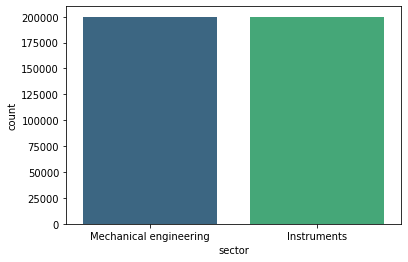

In [20]:
# Create dataset with 2 classes
df_2class = df[df.sector != 'Electrical engineering']
df_2class = df_2class[df_2class.sector != 'Chemistry']
y = df_2class['sector']
X = df_2class['text']
ax = sns.countplot(x='sector', data=df_2class, palette='viridis')

In [21]:
# Dataset with 2 classes
y.to_pickle('data/y_2class.pkl')
X.to_pickle('data/X_2class.pkl')

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)
y_train.to_pickle('data/y_train_2class.pkl')
y_test.to_pickle('data/y_test_2class.pkl')

In [23]:
X_train_transformed = vec.fit_transform(X_train).toarray()
X_train = pd.DataFrame(X_train_transformed, columns = vec.get_feature_names())
X_train.to_pickle('data/X_train_2class.pkl')

X_test_transformed = vec.transform(X_test).toarray()
X_test = pd.DataFrame(X_test_transformed, columns = vec.get_feature_names())
X_test.to_pickle('data/X_test_2class.pkl')